# การใช้ xarray จัดการข้อมูลอุณหภูมิผิวน้ำทะเล Sea Surface Temperature

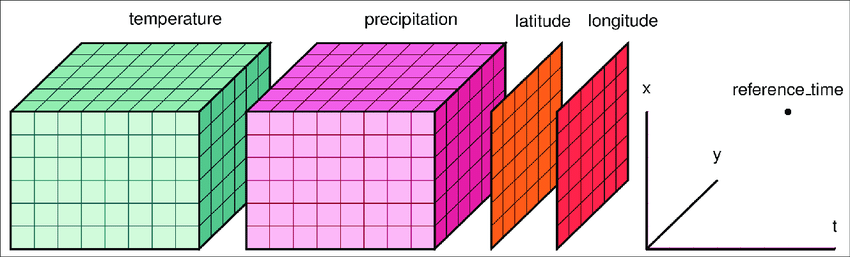


* อุณหภูมิผิวน้ำทะเล Sea Surface Temperature หรือ SST เป็นตัวแปรหนึ่งที่สำคัญมากต่อปริมาณไอน้ำในอากาศที่จะเป็นตัวกำหนดถึงปริมาณฝนในแต่ละพื้นที่บนโลก การเปลี่ยนแปลง SST ในช่วงเวลาใดช่วงเวลาหนึ่ง ส่งผลกระทบทั้งทางตรงและทางอ้อมกับทุกพื้นที่บนโลกมนุษย์เรา ดังนั้นนิสิตจำเป็นที่จะต้องเข้าใจรูปแบบเชิงพื้นที่และเชิงห้วงเวลาของ SST ในแง่ Spatio-Temporal variation ผ่านการวิเคราะห์ข้อมูลเชิงภูมิอากาศวิทยา


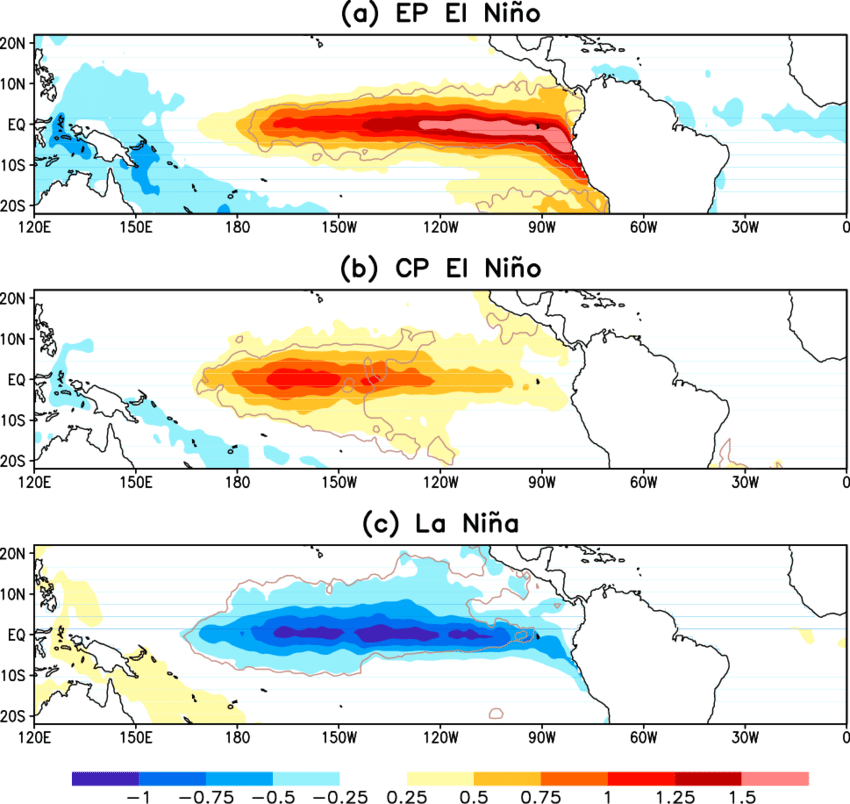

ภาพจากลิงก์ https://www.researchgate.net/figure/Composites-of-ASO-seasonal-mean-SST-anomalies-K-for-a-EP-El-Nino-1982-1986-1991_fig1_266794641



แหล่งข้อมูล
* โค้ดและไอเดียได้มาจาก http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html#Creating-data
    
* ดาวน์โหลดข้อมูลจาก https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html

* แหล่งข้อมูลที่เกี่ยวกับ SST เพิ่มเติม https://psl.noaa.gov/data/gridded/tables/sst.html

* อธิบายปรากฏการณ์เอลนิญโญ/ลานีญา https://oceanservice.noaa.gov/facts/ninonina.html

* เหตุการณ์เอลนิญโญ/ลานีญาในอดีต https://ggweather.com/enso/oni.htm


In [1]:
import numpy as np
import xarray as xr

## 1. เปิดข้อมูล

In [2]:
ds = xr.open_dataset('./1data/sst.mnmean_noaa_ersst_v5.nc') # sst รายเดือน เป็นข้อมูลที่ใช้ในการคำนวณ anomaly sst ของ noaa https://www.ncdc.noaa.gov/teleconnections/enso/sst
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2019, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-04-07

In [3]:
# ดึงข้อมูลมาเก็บในตัวแปร ทั้งสองวิธีเหมือนกัน

# dictionary syntax
sst = ds['sst']

# attribute syntax
sst = ds.sst

sst

<xarray.DataArray 'sst' (time: 2019, lat: 89, lon: 180)>
[32344380 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-03-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

## 2. การทำอินเด็กซ์แบบหลายมิติ Multidimensional Indexing


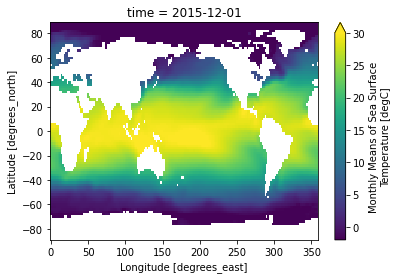

In [4]:
# เลือกช่วงเวลาที่เกิด strong elnino ปลายปี 2015 อ่าน https://www.ecmwf.int/en/newsletter/151/meteorology/2015-2016-el-nino-and-beyond
# อ่านเหตุการณ์เอลนิญโญในช่วงปี 2014-2016 สร้างผลกระทบไปทั่วโลก https://en.wikipedia.org/wiki/2014%E2%80%932016_El_Ni%C3%B1o_event
sst.sel(time='2015-12-01').plot(vmin=-2, vmax=30)


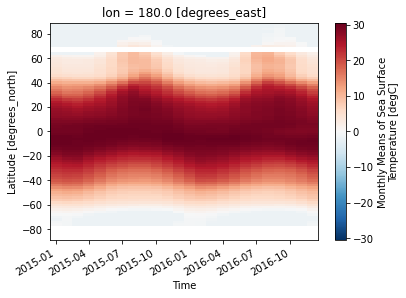

In [5]:
# เลือกเฉพาะลองติจูดที่สนใจแล้วพลอตข้อมูลในแต่ละช่วงเวลาที่สนใจ
sst.sel(time=slice('2015-01-01', '2016-12-01'), lon=180).transpose().plot()


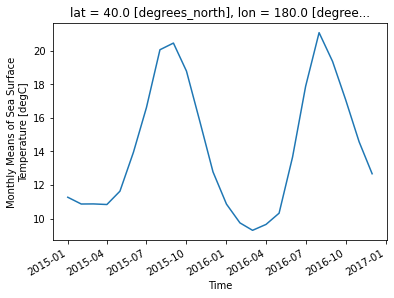

In [6]:
#เลือกตามค่าพิกัดที่ต้องการ แล้วทำการ slice time
sst.sel(time=slice('2015-01-01', '2016-12-01'),lon=180, lat=40).plot()


## 3.Label-Based Reduction Operations
Usually the process of data analysis involves going from a big, multidimensional dataset to a few concise figures. Inevitably, the data must be “reduced” somehow. Examples of simple reduction operations include:

Mean

Standard Deviation

Minimum

Maximum

etc. Xarray supports all of these and more, via a familiar numpy-like syntax. But with xarray, you can specify the reductions by dimension.


In [7]:
# คำนวณค่า meanทั้งหมด
sst.mean()


<xarray.DataArray 'sst' ()>
array(13.547334, dtype=float32)

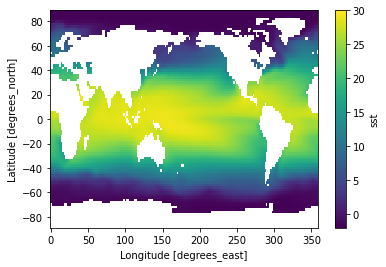

In [8]:
# คำนวณค่าเฉลี่ย sst ตามช่วงเวลาทั้งหมดที่มี แล้วพลอตแผนที่
sst_time_mean = sst.mean(dim='time')
sst_time_mean.plot(vmin=-2, vmax=30)

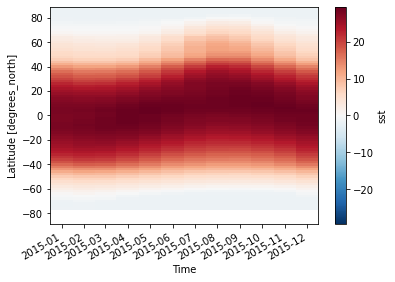

In [9]:
# คำนวณค่าเฉลี่ย sst ตามการ slice ช่วงเวลาในแนวลองจิจูด จึงเรียกว่า zonal mean
sst15 = sst.sel(time=slice('2015-01-01', '2015-12-01'))
sst_zonal_mean = sst15.mean(dim='lon')
sst_zonal_mean.transpose().plot()

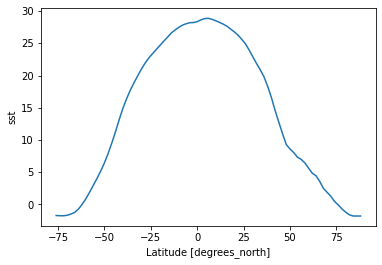

In [10]:
# เฉลี่ยค่า sst ในแนวลองจิจูดของ sst 2015
sst_time_and_zonal_mean = sst15.mean(dim=('time', 'lon'))
sst_time_and_zonal_mean.plot()

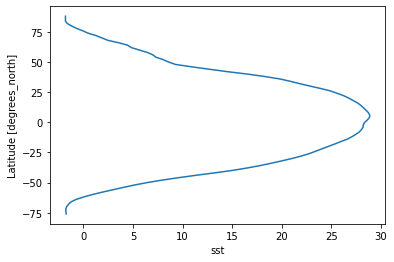

In [11]:
# เอียงแกนละติจูดในแนวแกน y
sst_time_and_zonal_mean.plot(y='lat')

## 4.การถ่วงค่าน้ำหนักกริดตามรูปทรงของโลก Weighted Mean

เนื่องจากรูปทรงของโลกเป็นทรงกลม หากจะให้การคำนวณมีความถูกต้อง จำเป็นที่จะต้องทำการถ่วงน้ำหนักตามแนวละติจูดและลองจิจูดประจำกริดนั้นๆ อย่างไรก็ตามในจากการถ่วงค่าน้ำหนักตามขนาดของกริดในแต่ละพิกัดภูมิศาสตร์ เนื่องจากรูปทรงของโลกที่เป็นทรงกลม จึงทำให้ขนาดพื้นที่ 1 กริดในบริเวณเส้นศูนย์สูตรจะมีพื้นที่ที่ใหญ่กว่าละติจูดกริดที่อยู่ในตำแหน่งที่สูงขึ้นไป

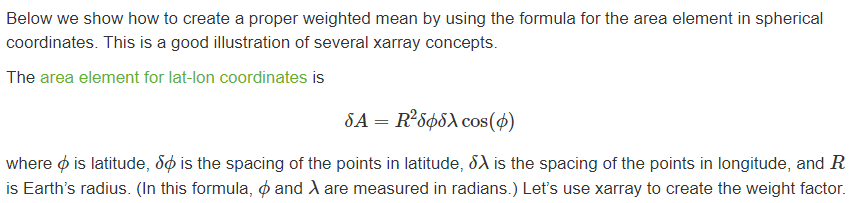

อ่านต่อตรงนี้ ค่อนข้างซับซ้อน แต่มีประโยชน์ในแง่การทำความเข้าใจสูตรการคำนวณ  https://en.wikipedia.org/wiki/Spherical_coordinate_system#Integration_and_differentiation_in_spherical_coordinates

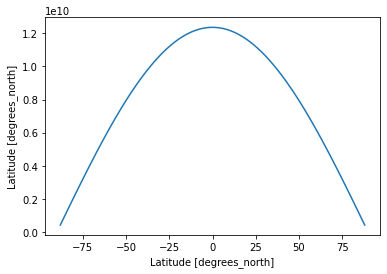

In [12]:
## คำนวณขนาดพื้นที่กริด ในแต่ละติจูด ที่พบว่าบริเวณเส้นศูนย์สูตรจะมีขนาดพื้นที่ 1 กริดที่ใหญ่กว่าละติจูดที่สูงขึ้นไป
R = 6.37e6
# we know already that the spacing of the points is one degree latitude
dϕ = np.deg2rad(1.)
dλ = np.deg2rad(1.)
dA = R**2 * dϕ * dλ * np.cos(np.deg2rad(ds.lat))
dA.plot()

In [46]:
dA.where(sst15[11].notnull())


<xarray.DataArray 'lat' (lat: 89, lon: 180)>
array([[4.3137274e+08, 4.3137274e+08, 4.3137274e+08, ..., 4.3137274e+08,
        4.3137274e+08, 4.3137274e+08],
       [8.6222048e+08, 8.6222048e+08, 8.6222048e+08, ..., 8.6222048e+08,
        8.6222048e+08, 8.6222048e+08],
       [1.2920163e+09, 1.2920163e+09, 1.2920163e+09, ..., 1.2920163e+09,
        1.2920163e+09, 1.2920163e+09],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 2015-12-01
Attributes:
    units:               degrees_north
    long_name:           Latitude
    actual_range:        [ 88. -88.]
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  center

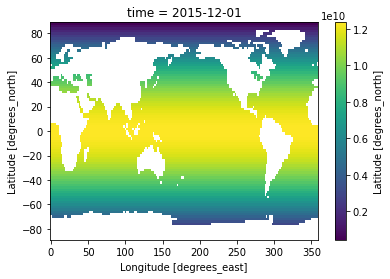

In [47]:
pixel_area = dA.where(sst15[11].notnull())
pixel_area.plot()

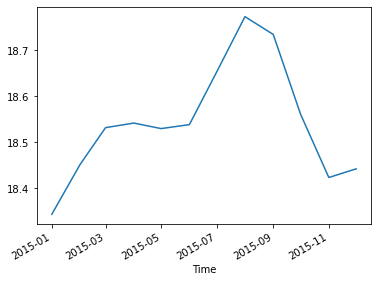

In [48]:
# ค่าเฉลี่ย sst ที่ได้จากการถ่วงค่าน้ำหนักตามขนาดของกริดในแต่ละพิกัดภูมิศาสตร์
total_ocean_area = pixel_area.sum(dim=('lon', 'lat'))
sst_weighted_mean = (sst15 * pixel_area).sum(dim=('lon', 'lat')) / total_ocean_area
sst_weighted_mean.plot()

## 5. Maps
การพลอตแผนที่โดยใช้ cartopy 



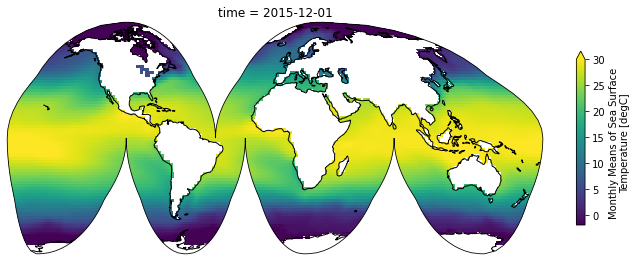

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()

sst15[11].plot(transform=ccrs.PlateCarree(), vmin=-2, vmax=30,
            cbar_kwargs={'shrink': 0.4})

## 6.การประมวลผลเบื้องต้น
* Groupby
* Resample and Rolling

### Groupby

In [50]:
# Groupby จะให้ผลลัพธ์ในหน่วย monthly
# Now that we have a bigger dataset, this is a good time to check out xarray’s groupby capabilities.

sst_clim = ds.sst.groupby('time.month').mean(dim='time')
sst_clim


<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.799839 , -1.7998716, -1.7999504, ..., -1.7999265,
         -1.7998831, -1.7998374],
        [-1.7998592, -1.7999223, -1.8      , ..., -1.8      ,
         -1.7999376, -1.7998677],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Text(0.5, 1.0, 'January minus July SST Climatology')

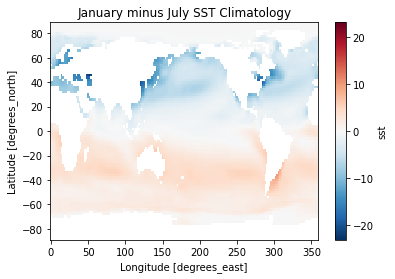

In [18]:
## พลอตแผนที่ความแตกต่าง sst ของเดือนมกราคม กับ กรกฎาคม
(sst_clim[0] - sst_clim[6]).plot()
plt.title('January minus July SST Climatology')

### Resample and Rolling
Resample is meant specifically to work with time data (data with a datetime64 variable as a dimension). It allows you to change the time-sampling frequency of your data.
Let’s illustrate by selecting a single point.



In [51]:
sst_ts = ds.sst.sel(lon=300, lat=10)
sst_ts_annual = sst_ts.resample(time='A').mean(dim='time')
sst_ts_annual

<xarray.DataArray 'sst' (time: 169)>
array([28.039495, 28.222002, 27.644287, 27.554443, 27.488977, 27.377548,
       27.555288, 27.080301, 27.038702, 26.572702, 27.012238, 27.45369 ,
       27.097803, 27.478567, 27.106323, 27.042864, 27.243553, 26.787804,
       26.702753, 27.170534, 27.35642 , 27.570671, 27.882978, 27.785551,
       28.332998, 28.13479 , 27.413927, 28.010208, 27.659399, 27.293692,
       27.132446, 27.471985, 28.00534 , 27.553518, 27.672464, 27.830452,
       27.091524, 27.33493 , 27.210676, 27.319334, 27.003729, 27.132355,
       27.70288 , 27.706148, 27.379759, 27.231573, 27.800737, 27.781042,
       27.390726, 27.68509 , 26.9591  , 27.211647, 27.478302, 27.156334,
       26.961687, 27.170479, 26.936142, 26.904364, 27.023489, 26.837824,
       27.180075, 27.809828, 27.46682 , 26.901178, 27.210304, 27.286764,
       27.07561 , 27.140556, 27.115366, 26.982725, 27.384499, 26.915314,
       27.433886, 27.634287, 27.122221, 27.006104, 27.198523, 27.725914,
       27.711327, 27.617945, 27.211645, 27.360947, 27.584723, 27.721878,
       27.58879 , 27.30115 , 28.051283, 28.118177, 27.843885, 27.563242,
       27.97474 , 28.183556, 27.471832, 27.43722 , 27.553202, 27.349749,
       27.44163 , 27.887365, 27.85993 , 27.805899, 27.631111, 27.586454,
       27.60991 , 27.641008, 28.341171, 27.66348 , 27.942228, 27.768415,
       27.894827, 27.970358, 27.704344, 27.54624 , 27.96817 , 27.65463 ,
       27.803984, 28.22583 , 27.92414 , 27.35621 , 27.47271 , 27.65056 ,
       27.302935, 27.226198, 27.228815, 27.540998, 27.575884, 27.823854,
       27.918837, 27.949213, 27.532715, 27.84609 , 27.424818, 27.296854,
       27.29438 , 27.853994, 27.861269, 27.378016, 27.678358, 27.440939,
       27.415815, 27.535814, 27.413033, 27.882318, 27.768152, 27.578407,
       28.281576, 28.024107, 27.718405, 27.726791, 27.830856, 28.011415,
       28.328903, 28.638664, 28.234842, 28.079782, 27.966255, 28.06825 ,
       28.792877, 28.443563, 28.204588, 28.288927, 27.882761, 28.019363,
       28.423697, 28.420975, 27.95926 , 28.079016, 28.384878, 28.141119,
       27.003141], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-12-31 1855-12-31 ... 2022-12-31
    lat      float32 10.0
    lon      float32 300.0

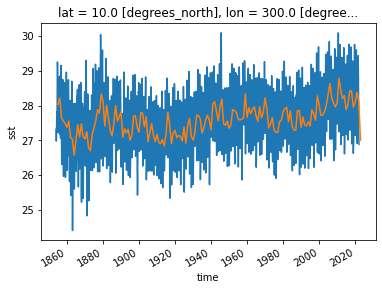

In [52]:
sst_ts.plot()
sst_ts_annual.plot()

An alternative approach is a “running mean” over the time dimension. This can be accomplished with xarray’s .rolling operation.

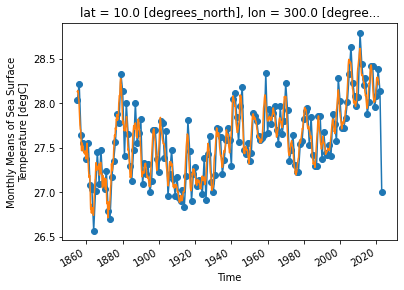

In [21]:
sst_ts_rolling = sst_ts.rolling(time=24, center=True).mean()
sst_ts_annual.plot(marker='o')
sst_ts_rolling.plot()

## 7.การหาค่า anomaly SST ปี 2015-2016 ช่วง strong elnino
การหาค่าเบี่ยงเบนของอุณหภูมิน้ำทะเลของเดือนที่สนใจเปรียบเทียบกับค่าเฉลี่ยเชิงภูมิอากาศวิทยา (>=30ปี) ขั้นตอน
* 1.เลือกช่วงเวลา 30 ปี เพื่อมาหาค่าเฉลี่ยเชิงภูมิอากาศวิทยาของ sst (climatological mean) หรือ เรียกว่า nornal value มักเรียกว่าค่าปรกติ
* 2.เลือกช่วงเวลาของปีหรือเดือนที่สนใจ ในที่นี้เราสนใจเดือน ธันวาคม 2015 
* 3.ทำการคำนวณค่า anomaly ของข้อ 2 เทียบกับข้อ 1 ด้วยการนำ 2-1
* 4.พลอตแผนที่ anomaly year 2015


ปรากฏการณ์เอลนิญโญ/ลานีญา
* อธิบายปรากฏการณ์เอลนิญโญ/ลานีญา https://oceanservice.noaa.gov/facts/ninonina.html
* เหตุการณ์เอลนิญโญ/ลานีญาในอดีต https://ggweather.com/enso/oni.htm


### 7.1 เลือกช่วงเวลา 30 ปี เพื่อมาหาค่าเฉลี่ยเชิงภูมิอากาศวิทยาของ sst (climatological mean)

In [22]:
# เลือกช่วงเวลา 30 ปีมาเก็บในตัวแปร
sst30yr=ds['sst'].sel(time=slice('1991-01-01', '2020-12-01'))

In [23]:
sst30yr #12 เดือน * 30 ปี = 360

<xarray.DataArray 'sst' (time: 360, lat: 89, lon: 180)>
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ...,

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

### 7.2 หาค่า sst เฉลี่ยเชิงภูมิอากาศวิทยาของข้อมูลรายเดือน

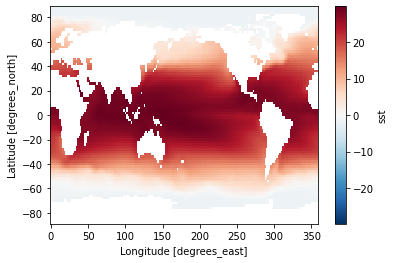

In [24]:
# หา climatological sst  ของรายเดือน
sst_clim_month=sst30yr.mean(dim='time')
sst_clim_month.plot()

In [25]:
### พลอตแผนที่ ภูมิอากาศวิทยาของ SST ให้สวยงาม
lon_ = sst_clim_month['lon']
lat_ = sst_clim_month['lat']

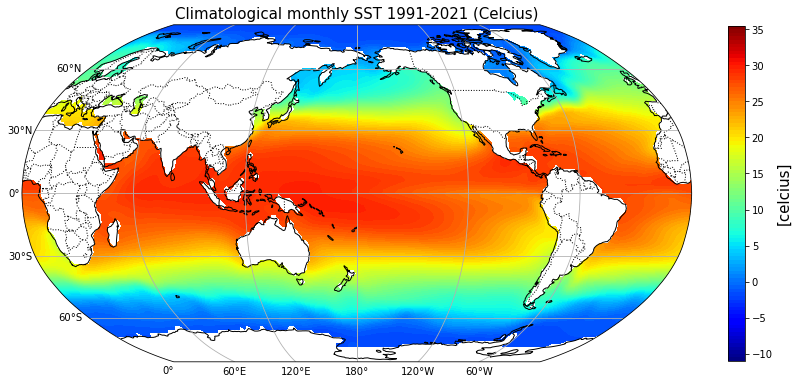

In [26]:
## พลอตแผนที่อุณหภูมิพื้นผิวน้ำทะเล SST เชิงภูมิอากาศวิทยา 30 ปี
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(sst_clim_month, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson(central_longitude=180))
#max_ = np.round((np.max(uw_cyc)))+2
#min_ = np.round((np.min(uw_cyc)))
max_ = 36
min_ = -11
vstep = 0.5
levels = np.arange(min_, max_, vstep)
temperature_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(temperature_,fraction=0.047*im_ratio)
cbar.set_label('[celcius]', fontsize=15)


plt.title('Climatological monthly SST 1991-2021 (Celcius)', fontsize=15)
plt.show()

* โดยปรกติ ชายฝั่งตะวันตกของทวีปอเมริกาใต้จะมีอุณหภูมิผิวน้ำทะเลที่เย็นกว่าบริเวณอื่นโดยรอบ เนื่องจากมีกระแสน้ำเย็นฮุมโลท์หรือกระแสน้ำเย็นเปรูที่ไหลเรียบชายฝั่งจากใต้ขึ้นไปยังเส้นศูนย์สูตร ทำให้พื้นที่ในแถบดังกล่าวมีความแห้งแล้ง เนื่องจากกระแสน้ำเย็นมีไอน้ำในอากาศน้อย และเป็นตัวขัดขวางการก่อตัวของการเกิดเมฆฝน เป็นเขตอากาศจมตัว
* โดยปรกติอุณหภูมิผิวน้ำทะเลทางตะวันตกของแปซิฟิคในเขตร้อน พบว่ามีอุณหภูมิที่สูงกว่าทางตะวันออก เนื่องจากมีกระแสลมค้า (trade winds) ที่พัดมาจากทางตะวันออก ทั้งจากซีกโลกเหนือและซีกโลกใต้  ทำให้บริเวณตะวันออกของอินโดนีเซีย ตะวันออกเฉียงเหนือของออสเตรเลีย มีปริมาณไอน้ำในอากาศที่มาก ทำให้เป็นเขตที่มีฝนชุก

## 7.3 อุณหภูมิผิวน้ำทะเลในช่วงเดือนธันวาคม 2015 ช่วง strong elnino

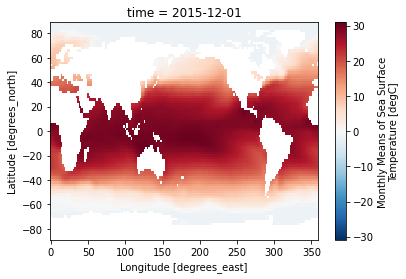

In [27]:
#เลือก sst เดือนที่สนใจดึงออกมาเก็บไว้ในตัวแปร
sst15_dec=sst.sel(time='2015-12-01') 

#พลอตแผนที่ 
sst15_dec.plot()

In [28]:
### พลอตแผนที่ SST เดือนธันวาคม 2015 ให้สวยงาม
lon_ = sst15_dec['lon']
lat_ = sst15_dec['lat']

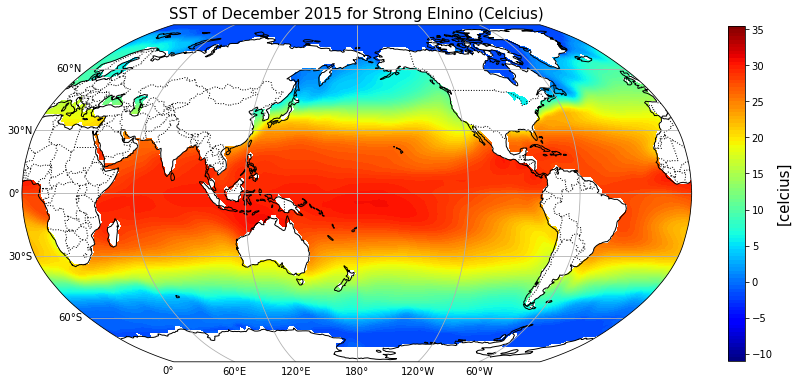

In [29]:
## พลอตแผนที่อุณหภูมิพื้นผิวน้ำทะเล SST ของเดือนธันวาคม 2015
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(sst15_dec, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson(central_longitude=180))
#max_ = np.round((np.max(uw_cyc)))+2
#min_ = np.round((np.min(uw_cyc)))
max_ = 36
min_ = -11
vstep = 0.5
levels = np.arange(min_, max_, vstep)
temperature_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(temperature_,fraction=0.047*im_ratio)
cbar.set_label('[celcius]', fontsize=15)


plt.title('SST of December 2015 for Strong Elnino (Celcius)', fontsize=15)
plt.show()

* แผนที่ด้านบนแสดงการกระจายตัวของอุณหภูมิผิวน้ำทะเลในช่วงเดือนธันวาคม 2015 ที่เป็นช่วง strong phase of Elnino 
* อย่างไรก็ตาม จากตัวแผนที่เอง ไม่ได้ทำให้เข้าใจถึงความรุนแรงหรือความผันแปรของอุณหภูมิผิวน้ำทะเลว่ามีระดับเท่าใด ในแต่ละพื้นที่ หากจะทำให้เข้าใจความผันแปรของอุณหภูมิที่เบี่ยงเบนจากค่าเฉลี่ยหรือค่าปรกติเชิงภูมิอากาศวิทยา จะต้องนำมาคำนวณค่า anomaly เพื่อเปรียบเทียบกับค่าเชิงภูมิอากาศวิทยา จึงจะทราบถึง spatial variation ของ SST ดังโค้ดการคำนวณในขั้นต่อไป 

## 7.4 หาค่า anomaly ของธันวาคม 2015

In [30]:
# หาค่า anomaly ของธันวาคม 2015
anomaly_dec15 = sst15_dec - sst_clim_month

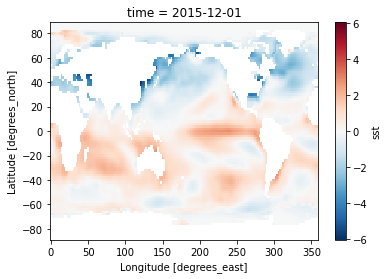

In [31]:
#พลอตแผนที่
anomaly_dec15.plot()

In [32]:
lon_ = anomaly_dec15['lon']
lat_ = anomaly_dec15['lat']

### พลอตแผนที่ SST anomaly ของเดือน 2015

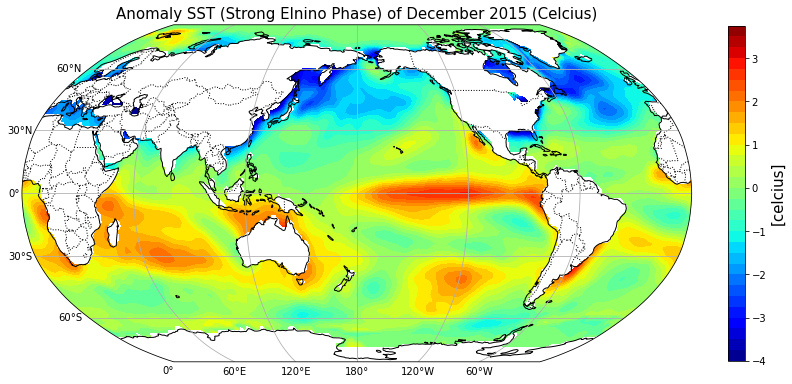

In [33]:
## พลอตแผนที่อุณหภูมิพื้นผิวน้ำทะเล SST
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(anomaly_dec15, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson(central_longitude=180))
#max_ = np.round((np.max(uw_cyc)))+2
#min_ = np.round((np.min(uw_cyc)))
max_ = 4
min_ = -4
vstep = 0.25
levels = np.arange(min_, max_, vstep)
temperature_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(temperature_,fraction=0.047*im_ratio)
cbar.set_label('[celcius]', fontsize=15)


plt.title('Anomaly SST (Strong Elnino Phase) of December 2015 (Celcius)', fontsize=15)
plt.show()

### อธิบาย
* ในช่วงเดือนธันวาคม ค.ศ. 2015 พบว่าบริเวณตอนกลางของมหาสมุทรแปซิฟิคในแนวเส้นศูนย์สูตรไปจนถึงชายฝั่งตะวันออกของแปซิฟิค พบว่ามีอุณหภูมิผิวน้ำทะเลที่อุ่นกว่าปีปรกติหรือมีค่าอุณหภูมิผิวน้ำทะเลที่สูงกว่าค่าเฉลี่ยเชิงภูมิอากาศวิทยา
* สอดคล้องกับการวิเคราะห์ค่าดัชนี ONI ที่รายงานโดย noaa https://www.ncdc.noaa.gov/teleconnections/enso/sst และ  https://ggweather.com/enso/oni.htm 

### งานมอบหมายนิสิต
* ให้นิสิตคำนวณค่า anomaly SST ของเดือน มกราคม-ธันวาคม ปี ค.ศ 2016 
* ให้นิสิตพลอตแผนที่ ค่า anomaly SST ของเดือน มกราคม-ธันวาคม ปี ค.ศ 2016 
* ให้นิสิตอธิบายผลค่า anomaly SST ของเดือนเหล่านั้นในเชิงพื้นที่และเชิงห้วงเวลา 
* คำแนะนำ หากนิสิตสามารถทำการ slice time แล้วพลอตออกมาเป็นกราฟเพื่อประกอบการอธิบาย จะทำให้เข้าใจมากยิ่งขึ้น

## 8.หาค่า anomaly ของปรากฏการณ์ลานีญา lanina 
* ในช่วงปี 2010-2011 เกิดปรากฏการณ์ลานีญาที่รุนแรง strong lanina โดยสอดคล้องกับผลการคำนวณดัชนี ONI จากลิงก์ https://www.ncdc.noaa.gov/teleconnections/enso/sst และ https://ggweather.com/enso/oni.htm
* ส่งผลกระทบในวงกว้างในหลายพื้นที่ทั่วโลก ในปี 2010 เกิดสภาวะน้ำท่วมในหลายประเทศได้แก่ ไทย ออสเตรเลีย ปากีสถาน เป็นต้น https://en.wikipedia.org/wiki/2010%E2%80%932012_La_Ni%C3%B1a_event รวมถึงเกิดผลกระทบความแห้งแล้ง drought ต่อเนื่องในปี 2011 ในพื้นที่ตะวันออกของทวีปแอฟริกา https://en.wikipedia.org/wiki/2011_East_Africa_drought
* นอกจากนั้นยังส่งผลกระทบต่อเนื่องต่อการบริหารจัดการน้ำในหลายประเทศ เกิดมหาอุทกภัยในประเทศไทยในปี 2011 ซึ่งเป็นผลกระทบของความต่อเนื่องของปรากฏการณ์ลานีญา https://en.wikipedia.org/wiki/2011_Thailand_floods  ซึ่งมีการรวบรวมรายงานสถานีการณ์โดย สสนก.จากลิงก์นี้ https://bit.ly/39iu1IM
* แบบฝึกหัดต่อไปนี้นิสิตจะได้เรียนรู้ขั้นตอนในการคำนวณค่า anomaly SST ในปี 2010 ช่วงที่มีรายงานปรากฏการณ์ strong lanina
    * 1.เลือกช่วงเวลา 30 ปี เพื่อมาหาค่าเฉลี่ยเชิงภูมิอากาศวิทยาของ sst (climatological mean) หรือ เรียกว่า nornal value มักเรียกว่าค่าปรกติ
    * 2.เลือกช่วงเวลาของปีหรือเดือนที่สนใจ ในที่นี้เราสนใจเดือน ธันวาคม 2010
    * 3.ทำการคำนวณค่า anomaly ของข้อ 2 เทียบกับข้อ 1 ด้วยการนำ 2-1
    * 4.พลอตแผนที่ anomaly year 2010 

### 8.1 เลือกช่วงเวลา 30 ปี เพื่อมาหาค่าเฉลี่ยเชิงภูมิอากาศวิทยาของ ss

In [34]:
# เลือกช่วงเวลา 30 ปีมาเก็บในตัวแปร
sst30yr=ds['sst'].sel(time=slice('1991-01-01', '2020-12-01'))

In [35]:
# ตรวจข้อมูล
sst30yr

<xarray.DataArray 'sst' (time: 360, lat: 89, lon: 180)>
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ...,

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

### 8.2 หาค่า sst เฉลี่ยเชิงภูมิอากาศวิทยาแบบรายเดือน

In [36]:
# หา climatological sst  ของเดือนธันวาคม
sst_clim_month=sst30yr.mean(dim='time')


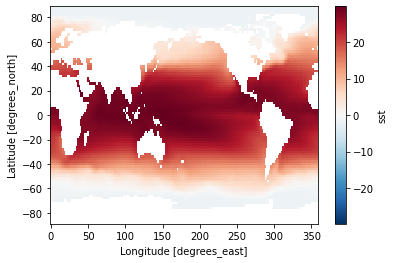

In [37]:
# พลอตแผนที่
sst_clim_month.plot()

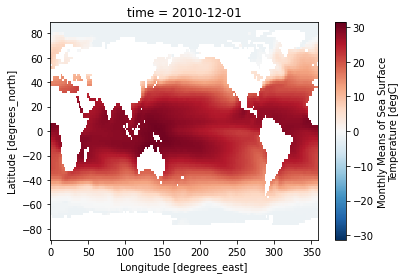

In [38]:
#เลือก sst เดือนที่สนใจดึงออกมาเก็บไว้ในตัวแปร
sst10_dec=sst.sel(time='2010-12-01') 

#พลอตแผนที่ 
sst10_dec.plot()

### พลอตแผนที่ SST เดือนธันวาคม 2010 ในช่วง strong lanina ให้สวยงาม

In [39]:
### พลอตแผนที่ SST เดือนธันวาคม 2015 ให้สวยงาม
lon_ = sst10_dec['lon']
lat_ = sst10_dec['lat']

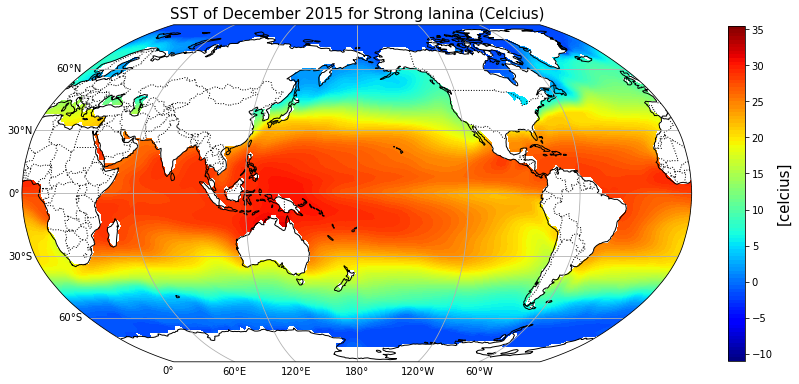

In [40]:
## พลอตแผนที่อุณหภูมิพื้นผิวน้ำทะเล SST ของเดือนธันวาคม 2015
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(sst10_dec, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson(central_longitude=180))
#max_ = np.round((np.max(uw_cyc)))+2
#min_ = np.round((np.min(uw_cyc)))
max_ = 36
min_ = -11
vstep = 0.5
levels = np.arange(min_, max_, vstep)
temperature_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(temperature_,fraction=0.047*im_ratio)
cbar.set_label('[celcius]', fontsize=15)


plt.title('SST of December 2015 for Strong lanina (Celcius)', fontsize=15)
plt.show()

* แผนที่ด้านบนแสดงการกระจายตัวของอุณหภูมิผิวน้ำทะเลในช่วงเดือนธันวาคม 2010 ที่เป็นช่วง strong phase of Lanina 
* จากแผนที่พบว่าพื้นที่นอกจากฝั่งตะวันตกของทวีปอเมริกาใต้ มีอุณหภูมิผิวน้ำทะเลที่เย็นกว่าโดยรอบ แสดงเป็นสีเหลืองและเขียว แต่ก็ยังไม่ชัดเจนในแง่เชิงภูมิอากาศวิทยา ซึ่งจะมีคำถามว่า แตกต่างกับค่าเชิงภูมิอากาศมากน้อยแค่ไหน หรืออาจจะเป็นค่าปรกติที่ใกล้เคียงกับค่าเชิงภูมิอากาศวิทยาก็ได้ ที่บริเวณดังกล่าวจะมีอุณหภูมิที่เย็นกว่าพื้นที่โดยรอบอยู่แล้ว เนื่องจากมีกระแสน้ำเย็นเปรูไหลผ่าน
* อย่างไรก็ตาม จากตัวแผนที่เอง ไม่ได้ทำให้เข้าใจถึงความรุนแรงหรือความผันแปรของอุณหภูมิผิวน้ำทะเลว่ามีระดับเท่าใด ในแต่ละพื้นที่ หากจะทำให้เข้าใจความผันแปรของอุณหภูมิที่เบี่ยงเบนจากค่าเฉลี่ยหรือค่าปรกติเชิงภูมิอากาศวิทยา จะต้องนำมาคำนวณค่า anomaly เพื่อเปรียบเทียบกับค่าเชิงภูมิอากาศวิทยา จึงจะทราบถึง spatial variation ของ SST ดังโค้ดการคำนวณในขั้นต่อไป 

### 8.3 หาค่า anomaly ของธันวาคม 2010

In [41]:
# หาค่า anomaly ของธันวาคม 2010
anomaly_dec10 = sst10_dec - sst_clim_month
anomaly_dec10


<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.0397434e-03, -9.8633766e-04, -9.4664097e-04, ...,
        -8.5020065e-04, -9.8228455e-04, -1.0770559e-03],
       [-9.9182129e-04, -1.0868311e-03, -1.1429787e-03, ...,
        -2.9122829e-04, -6.9665909e-04, -8.4769726e-04],
       [-3.4928322e-05, -3.5762787e-04, -5.6958199e-04, ...,
        -2.4628639e-04, -1.5783310e-04, -7.3552132e-05],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 2010-12-01

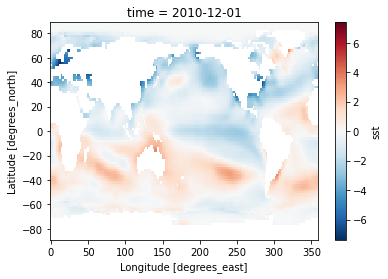

In [42]:
#พลอตแผนที่
anomaly_dec10.plot()

### 7.4 พลอตแผนที่ผลลัพธ์ให้สวยงาม

In [43]:
lon_ = anomaly_dec10['lon']
lat_ = anomaly_dec10['lat']

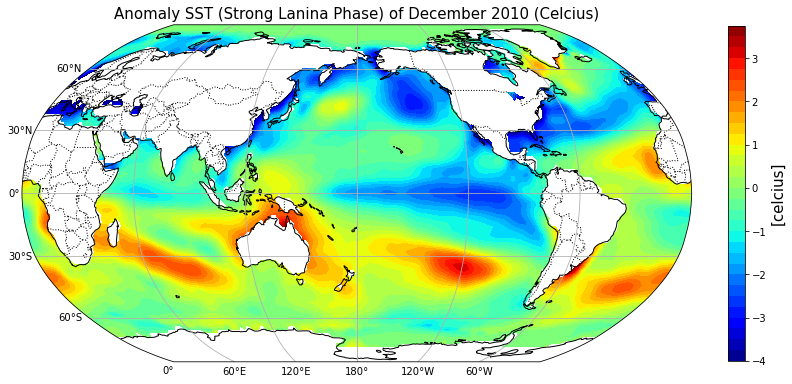

In [44]:
## พลอตแผนที่อุณหภูมิพื้นผิวน้ำทะเล SST
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(anomaly_dec10, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson(central_longitude=180))
#max_ = np.round((np.max(uw_cyc)))+2
#min_ = np.round((np.min(uw_cyc)))
max_ = 4
min_ = -4
vstep = 0.25
levels = np.arange(min_, max_, vstep)
temperature_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(temperature_,fraction=0.047*im_ratio)
cbar.set_label('[celcius]', fontsize=15)


plt.title('Anomaly SST (Strong Lanina Phase) of December 2010 (Celcius)', fontsize=15)
plt.show()

### สรุปผลเปรียบเทียบ

### 1.แผนที่ SST เฉลี่ย 30 ปี
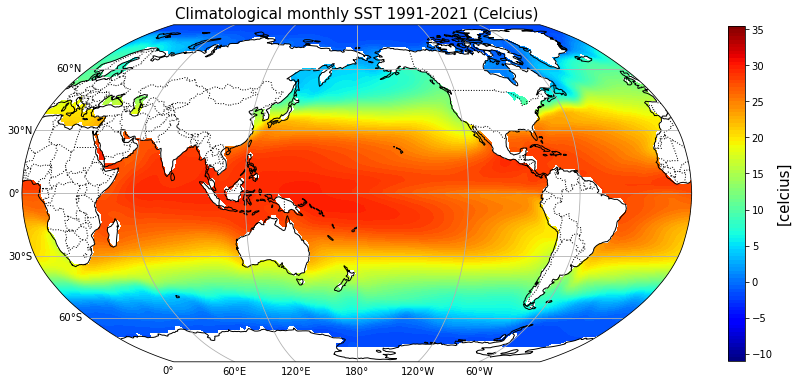

### 2.แผนที่ SST anomaly ช่วง Strong Elnino ในเดือนธันวาคม 2015
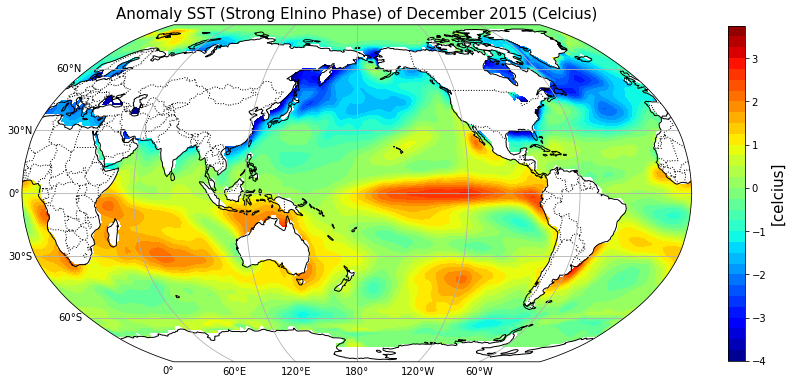

### 3.แผนที่ SST anomaly ช่วง Strong Lanina ในเดือนธันวาคม 2010
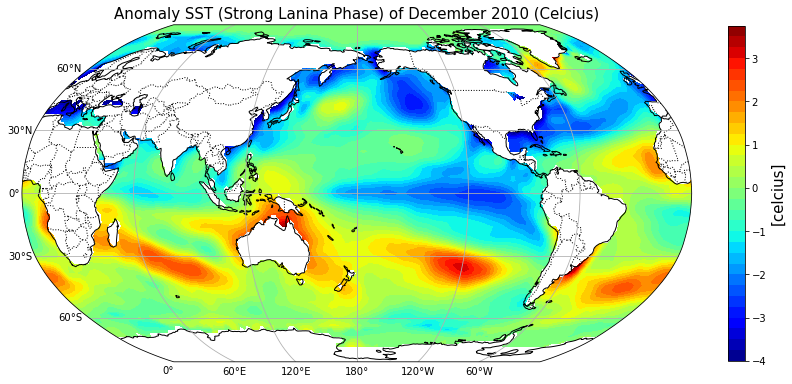


### อธิบาย
* ค่า anomaly SST ของเดือนธันวาคม 2010 พบว่าในแนวใกล้เส้นศูนย์สูตรบริเวณแปซิฟิคตอนกลาง มีอุณหภูมิผิวน้ำทะเลที่เย็นกว่าค่าปรกติ นั่นคือ ในปีปรกติจะมีกระแสลมที่พัดน้ำทะเลที่อุ่นไปทางตะวันตกของมหาสมุทรแปซิฟิค นำความชุ่มชื้นไปให้พื้นที่แปซิฟิคตะวันตก อย่างไรก็ตามอุณหภูมิผิวน้ำทะเลในปีลานิญา พบว่ามีอุณหภูมิที่ต่ำกว่าปีปรกติในทางตะวันออกและตอนกลางของมหาสมุทรแปซิฟิค ลมพัดแรงไปทางตะวันตกมากกว่าปีปรกติ ส่งผลต่อความแห้งแล้งแถบในเขตอเมริกาใต้ฝั่งตะวันตกมากขึ้นกว่าปีปกติ อย่างไรก็ตามหากวิเคราะลมในองค์ประกอบ U-wind จะทำให้เข้าใจความแรงของกระแสลม และจะเข้าใจพัฒนาการของปรากฏการณ์ได้ ก็ต่อเมื่อวิเคราะห์ข้อมูลในเชิงห้วงเวลาที่ต่อเนื่องกัน เช่น การพลอต SST ในแต่ละรายเดือนในช่วง ปี 2010-2011  ร่วมกับตัวแปรลม ความกดอากาศและปริมาณฝน

### คำแนะนำ
* ควรพลอตข้อมูลตัวแปรอื่นๆ เพิ่มเติม เพื่อช่วยในการวิเคราะห์ผลกระทบของปรากฏการณ์ลานีญาเชิงพื้นที่และเชิงห้วงเวลา ให้เข้าใจเพิ่มเติมมากขึ้น ดาวน์โหลดจากข้อมูลลิงก์นี้ https://psl.noaa.gov/data/gridded/tables/surface.html เช่น 
    * 1. ปริมาณฝน เช่น CMAP Precipitation ใช้ตัวแปร Mean (Standard Monthly) จากลิงก์ https://psl.noaa.gov/data/gridded/data.cmap.html
    * 2. ความเร็วและทิศทางลมในแต่ละระดับความกดบรรยากาศ ใช้ตัวแปร U-wind และ V-wind (Monthly Mean)   https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.surface.html
    * 3. ความกดบรรยากาศระดับน้ำทะเล SLP sea level pressure ใช้ตัวแปร Sea level pressure (Monthly Mean) จากลิงก์ https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.surface.html
    * 4.อุณหภูมิอากาศระดับผิวพื้น ใช้ตัวแปร Air Temperature	(Monthly Mean)  จากลิงก์ https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.surface.html
    * 5.การแผ่รังสีคลื่นยาวออกไปสู่นอกบรรยากาศ OLR หรือ Outgoing Longwave Radiation ตัวแปรนี้หากมีค่ามากแสดงว่ารังสีคลื่นยาวออกไปนอกบรรยากาศมาก แสดงว่ามีเมฆน้อยในบริเวณนั้นๆ หากมีค่าน้อยแสดงถึงรังสีแผ่ออกไปได้น้อย เนื่องจากติดเมฆนั่นคือ มีเมฆมากนั่นเอง นำไปสู่ฝนมาก ใช้ Monthly Mean จากลิงก์ https://psl.noaa.gov/data/gridded/data.interp_OLR.html

### งานมอบหมาย
* ให้นิสิตคำนวณค่า anomaly SST ของเดือน มกราคม-ธันวาคม ปี ค.ศ 2011
* ให้นิสิตพลอตแผนที่ ค่า anomaly SST ของเดือน มกราคม-ธันวาคม ปี ค.ศ 2011
* ให้นิสิตอธิบายผลค่า anomaly SST ของเดือนเหล่านั้นในเชิงพื้นที่และเชิงห้วงเวลา 
* คำแนะนำ หากนิสิตสามารถทำการ slice time แล้วพลอตออกมาเป็นกราฟเพื่อประกอบการอธิบาย จะทำให้เข้าใจมากยิ่งขึ้น
* ลองพลอตแผนที่ปริมาณฝนจากตัวแปรที่แนะนำไปด้านบน

## 9.การหาค่า Enso index

จากลิงก์ http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html#Creating-data

Finale: Calculate the ENSO Index
This page from NOAA https://www.ncdc.noaa.gov/teleconnections/enso/sst explains how the El Niño Southern Oscillation index is calculated.

The Nino 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.

Warm or cold phases of the Oceanic Nino Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above (below) the threshold of +0.5°C (-0.5°C). This is known as the Oceanic Niño Index (ONI).

(Note that “anomaly” means that the seasonal cycle is removed.)

### เติมโค้ดตรงนี้

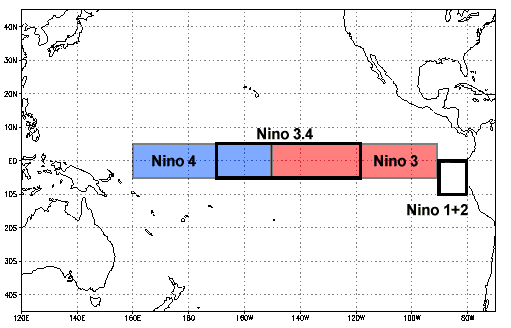


ขั้นตอนในการคำนวณหา ONI ในพื้นที่ Nino 3.4 region 
* 1. เลือกข้อมูลภูมิอากาศวิทยา 30 ปี ด้วยการ slice time
* 2. slice ข้อมูลในแนวละติจูดและลองติจูด between +/- 5 deg. lat, 170 W - 120 W lon. ซึ่งอยู่ในพื้นที่ Nino 3.4 region 
    * คำนวณค่า climatological mean ในพื้นที่ Nino 3.4
    * คำนวณค่า anomaly ในช่วงเวลาที่สนใจ หรือ อาจจะคำนวณ 30 ปีก็ได้
    * จะให้ผลลัพธ์เป็นค่า anomaly แต่ละช่วงเดือน
* 3. ทำการคำนวณค่าดัชนี ONI ด้วยการนำผลลัพธ์ข้อ 2 มาทำการคำนวณ running mean  ด้วยการใช้ a five consecutive 3-month running mean 
    * จะให้ผลลัพธ์ ที่สามารถนำมาพลอตเป็นกราฟได้

Once you’re done, try comparing the ENSO Index you calculated with the NINO3.4 index published by NOAA. The pandas snippet below will load the official time series for comparison.



In [45]:
import pandas as pd
noaa_nino34 = pd.read_csv('https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices',
                          sep=r" ", skipinitialspace=True,
                          parse_dates={'time': ['YR','MON']},
                          index_col='time')['NINO3.4']
noaa_nino34.head()

time
1982-01-01    26.65
1982-02-01    26.54
1982-03-01    27.09
1982-04-01    27.83
1982-05-01    28.37
Name: NINO3.4, dtype: float64